# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import requests
import os
import json
import pymongo

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html

url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'

# Retrieve page with the requests module
html = requests.get(url)
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html=browser.html
soup = soup(html, 'html.parser')
soup

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<meta content="Mark Otto, Jacob Thornton, and Bootstrap contributors" name="author"/>
<meta content="Hugo 0.84.0" name="generator"/>
<title>Mars Temperature Data</title>
<link href="https://getbootstrap.com/docs/5.0/examples/jumbotron/" rel="canonical"/>
<!-- Bootstrap core CSS -->
<link crossorigin="anonymous" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css" integrity="sha384-ggOyR0iXCbMQv3Xipma34MD+dH/1fQ784/j6cY/iJTQUOhcWr7x9JvoRxT2MZw1T" rel="stylesheet"/>
<style>
    .bd-placeholder-img {
      font-size: 1.125rem;
      text-anchor: middle;
      -webkit-user-select: none;
      -moz-user-select: none;
      user-select: none;
    }

    @media (min-width: 768px) {
      .bd-placeholder-img-lg {
        font-size: 3.5rem;
      }
    }
  </style>
</head>
<body>
<main>
<div class="container py-4">


In [5]:
 # Find the table
table = soup.find('table', class_='table')
table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

In [6]:
table_header = table.find_all('th')

headers=[]
for each in table_header:
    title=each.text
    headers.append(title)
    
headers


['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
df=pd.DataFrame(columns=headers)
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure


In [8]:
# Find the row data 
for row in table.find_all('tr',class_='data-row'):
        data = row.find_all('td')
        row_data=[td.text.strip() for td in data]
        lenghth=len(df)
        df.loc[lenghth]=row_data
        
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [9]:
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Change data types 
df['id']=df['id'].astype(int)
df['terrestrial_date']=pd.to_datetime(df['terrestrial_date'])
df['sol']=df['sol'].astype(int)
df['ls']=df['ls'].astype(int)
df['month']=df['month'].astype(int)
df['min_temp']=df['min_temp'].astype(float)
df['pressure']=df['pressure'].astype(float)

# Check data types again 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int32         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(4)
memory usage: 87.5 KB


In [11]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
months=df['month'].nunique()
print(f'There are', months ,'months on Mars.')

There are 12 months on Mars.


In [13]:
# 2. How many Martian days' worth of data are there?
first_day=df['sol'].min()
last_day = df['sol'].max()
unique_days=df['sol'].nunique()
print(unique_days)

1867


In [14]:
# get table headers
headers = list(df)

# coldest and warmest months on Mars
min_temp_df = df[headers[2:]].groupby('month', as_index=False).mean().sort_values('month')
min_temp_df

,month,sol,ls,min_temp,pressure
0,1,1077.574713,15.281609,-77.160920,862.488506
1,2,1175.853933,44.258427,-79.932584,889.455056
2,3,1204.406250,75.010417,-83.307292,877.322917
3,4,1244.500000,104.365979,-82.747423,806.329897
4,5,1182.691275,132.885906,-79.308725,748.557047
5,6,750.829932,164.897959,-75.299320,745.054422
6,7,715.105634,194.894366,-72.281690,795.105634
7,8,795.333333,224.347518,-68.382979,873.829787
8,9,861.186567,254.052239,-69.171642,913.305970
9,10,1034.669643,286.330357,-71.982143,887.312500


In [15]:
# Find the data row when the minimum and maximum temparatures were recorded.
# Identify the coldest and hottest months in Curiosity's location
min_max_df=df.loc[(df['min_temp'] == df['min_temp'].min()) | (df['min_temp'] == df['min_temp'].max()), headers[1:]]


Text(0.5, 1.0, 'Average Minimum Temperature by Month')

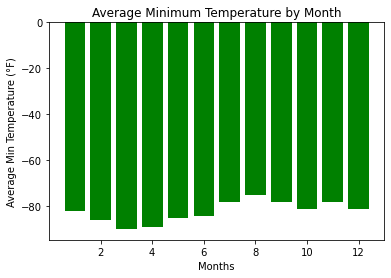

In [16]:
# Plot the average temperature by month

# Plot avg_min_temp
plt.bar(df['month'],df['min_temp'], color='green')

# Create labels for the x and y axes.
plt.xlabel("Months")
plt.ylabel("Average Min Temperature (\N{DEGREE SIGN}F)")

# Create title 
plt.title('Average Minimum Temperature by Month')


From the graph above, the Coldest month is month 3 and the Warmest month is month 8.

In [17]:
# 4. Average pressure by Martian month

pressure_df = df[headers[2:]].groupby('month', as_index=False).mean().sort_values('month')
pressure_df


,month,sol,ls,min_temp,pressure
0,1,1077.574713,15.281609,-77.160920,862.488506
1,2,1175.853933,44.258427,-79.932584,889.455056
2,3,1204.406250,75.010417,-83.307292,877.322917
3,4,1244.500000,104.365979,-82.747423,806.329897
4,5,1182.691275,132.885906,-79.308725,748.557047
5,6,750.829932,164.897959,-75.299320,745.054422
6,7,715.105634,194.894366,-72.281690,795.105634
7,8,795.333333,224.347518,-68.382979,873.829787
8,9,861.186567,254.052239,-69.171642,913.305970
9,10,1034.669643,286.330357,-71.982143,887.312500


In [18]:
#Months with lowest and highest atmospheric pressure recorded
df.loc[(df['pressure'] == df['pressure'].min()) | (df['pressure'] == df['pressure'].max()), headers[2:]]

,sol,ls,month,min_temp,pressure
156,170,252,9,-66.0,925.0
157,171,253,9,-67.0,925.0
766,846,257,9,-74.0,925.0
1866,1977,135,5,-77.0,727.0


Text(0.5, 1.0, 'Average Pressure by Month')

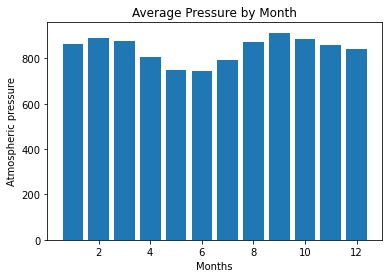

In [19]:
# plot the average atmospheric daily pressure by month
x=range(1,13)
plt.bar(x,pressure_df['pressure'])

# Create labels for the x and y axes.
plt.xlabel("Months")
plt.ylabel("Atmospheric pressure")

# Create title 
plt.title('Average Pressure by Month')

From the graph above, the highest and lowest atmospheric pressure on Mars on average is month 9th and month 6th respectively.

In [20]:
# 5. How many terrestrial (earth) days are there in a Martian year?
#Finding the first(original) Sun longitude meaning the first recorded row in the dataset
orig_long=df['ls'].loc[0]
orig_long

155

In [21]:
# Given that the Sun longitude will be the same after almost 1 Martial year, find the next rows where longitude is equal the orig_long
same_long=df.loc[df['ls']==orig_long]
same_long


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
598,621,2014-07-03,678,155,6,-77.0,739.0
599,624,2014-07-04,679,155,6,-77.0,738.0
1249,1274,2016-05-20,1346,155,6,-75.0,737.0
1250,1277,2016-05-21,1347,155,6,-75.0,736.0


In [22]:
#Find the terrestrial date after approximately 1 Martial year
earth_date=same_long['terrestrial_date'].loc[0]
# earth_date

date_after_martial_year = same_long['terrestrial_date'].iloc[1]
# date_after_martial_year

one_martial_year= date_after_martial_year-earth_date
one_martial_year
print(f'In one Martial year, nearly ',one_martial_year,'pass on Earth')

In one Martial year, nearly  686 days 00:00:00 pass on Earth


Text(0.5, 1.0, 'Mars Daily Minimum Temperature by Mars Sol')

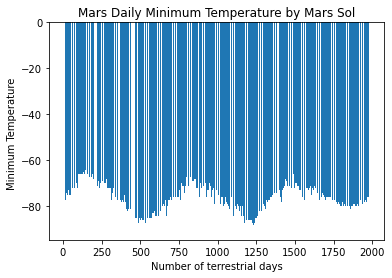

In [23]:
# Ploting the minimum temperature vs Martian Days 
plt.bar(df['sol'],df['min_temp'])

# Create labels for the x and y axes.
plt.xlabel("Number of terrestrial days")
plt.ylabel("Minimum Temperature ")

# Create title 
plt.title('Mars Daily Minimum Temperature by Mars Sol')

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1250-575, or 675 days. A year on Mars appears to be about 675 days from the plot.
Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [24]:
# Write the data to a CSV
df.to_csv('Data/mars_table.csv',index=False)

In [25]:
browser.quit()